In [2]:
#import 
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()
dfJCW = pd.read_csv(io.BytesIO(uploaded['restaurants.csv']))

Saving restaurants.csv to restaurants.csv


In [3]:
dfJCW.describe(include='all')

,entity_id,location_name,sub_category,price,exotic,avg_length,avg_negativity,avg_positivity,avg_subjectivity,avg_readablity,useful,funny,cool,popularity
count,999.000000,986,986,984,979.000000,957.000000,957.000000,957.000000,957.000000,957.000000,999.000000,999.000000,999.000000,999.000000
unique,NaN,718,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Dunkin',Full-Service Restaurants,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,92,514,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,483.132132,NaN,NaN,NaN,0.304392,86.381662,0.055988,0.178358,0.564876,80.103313,13.340695,4.562226,6.405432,0.500501
std,277.138511,NaN,NaN,NaN,0.460385,24.942186,0.037159,0.072944,0.070012,5.829734,21.586018,9.967090,12.869735,0.500250
min,1.000000,NaN,NaN,NaN,0.000000,8.880000,0.000000,0.000292,0.152124,34.890530,0.000000,0.000000,0.000000,0.000000
25%,242.500000,NaN,NaN,NaN,0.000000,71.597168,0.030239,0.127310,0.533451,77.618584,1.000000,0.000000,0.000000,0.000000
50%,485.000000,NaN,NaN,NaN,0.000000,86.272346,0.046529,0.182310,0.571667,80.513985,5.400000,1.000000,1.333333,1.000000
75%,725.500000,NaN,NaN,NaN,1.000000,101.366330,0.075124,0.223996,0.600339,83.265312,17.000000,5.000000,7.000000,1.000000


In [4]:
dfJCW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity_id         999 non-null    int64  
 1   location_name     986 non-null    object 
 2   sub_category      986 non-null    object 
 3   price             984 non-null    object 
 4   exotic            979 non-null    float64
 5   avg_length        957 non-null    float64
 6   avg_negativity    957 non-null    float64
 7   avg_positivity    957 non-null    float64
 8   avg_subjectivity  957 non-null    float64
 9   avg_readablity    957 non-null    float64
 10  useful            999 non-null    float64
 11  funny             999 non-null    float64
 12  cool              999 non-null    float64
 13  popularity        999 non-null    int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 109.4+ KB


In [6]:
#Null % - Missing Values
dfJCW.isnull().sum()/len(dfJCW)

entity_id           0.000000
location_name       0.013013
sub_category        0.013013
price               0.015015
exotic              0.020020
avg_length          0.042042
avg_negativity      0.042042
avg_positivity      0.042042
avg_subjectivity    0.042042
avg_readablity      0.042042
useful              0.000000
funny               0.000000
cool                0.000000
popularity          0.000000
dtype: float64

In [7]:
#drop variables
dfJCW = dfJCW.drop(columns= ["entity_id", "sub_category"], axis=1)

In [8]:
#impute
dfJCW.isnull().sum()/len(dfJCW)
NA_names =['avg_length','avg_negativity','avg_positivity','avg_subjectivity','avg_readablity','exotic']
dfJCW[NA_names]=dfJCW[NA_names].fillna(dfJCW[NA_names].mean())

dfJCW['price']=dfJCW['price'].fillna('one')

In [10]:
dfJCW.isnull().sum()/len(dfJCW) #just to check

location_name       0.013013
price               0.000000
exotic              0.000000
avg_length          0.000000
avg_negativity      0.000000
avg_positivity      0.000000
avg_subjectivity    0.000000
avg_readablity      0.000000
useful              0.000000
funny               0.000000
cool                0.000000
popularity          0.000000
dtype: float64

In [11]:
dfJCW = dfJCW.drop(columns= ["location_name"], axis = 1) #Drop location_name

<ipython-input-12-252245016f83>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfJCW.skew(skipna=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf919a1dc0>,
      dtype=object)

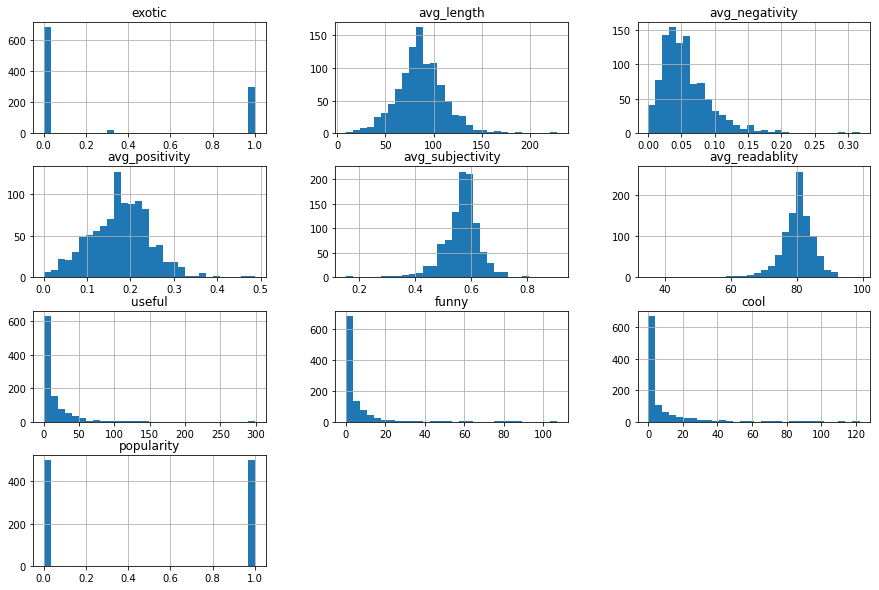

In [12]:
dfJCW.skew(skipna=True)
dfJCW.hist(bins=30,figsize=(15,10))

In [13]:
#Logs
import numpy as np

log_names=['useful','funny','cool']
print(dfJCW[log_names])

dfJCW_log = dfJCW[log_names].applymap(lambda x: np.log(x+1))
dfJCW_log.describe

        useful      funny       cool
0     0.000000   0.000000   0.000000
1     4.000000   1.000000   0.000000
2    21.333333   7.000000  15.833333
3     4.000000   0.000000   0.000000
4    13.833333   7.500000   2.000000
..         ...        ...        ...
994  50.867965  21.876191  30.425181
995  13.000000   3.500000   6.000000
996   0.000000   0.000000   0.000000
997  74.569048   8.977381  14.259524
998  14.500000   4.000000   8.000000

[999 rows x 3 columns]


<bound method NDFrame.describe of        useful     funny      cool
0    0.000000  0.000000  0.000000
1    1.609438  0.693147  0.000000
2    3.106080  2.079442  2.823361
3    1.609438  0.000000  0.000000
4    2.696877  2.140066  1.098612
..        ...       ...       ...
994  3.948701  3.130097  3.447609
995  2.639057  1.504077  1.945910
996  0.000000  0.000000  0.000000
997  4.325047  2.300321  2.725204
998  2.740840  1.609438  2.197225

[999 rows x 3 columns]>

In [14]:
dfJCW.dum1 = pd.get_dummies(dfJCW[['exotic']], drop_first = True)
dfJCW.dum2 = pd.get_dummies(dfJCW['price'].astype(str), drop_first= True)
print(dfJCW.dum1.describe)

<bound method NDFrame.describe of      exotic
0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
..      ...
994     0.0
995     1.0
996     0.0
997     0.0
998     1.0

[999 rows x 1 columns]>


<ipython-input-14-ae270b7da285>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfJCW.dum1 = pd.get_dummies(dfJCW[['exotic']], drop_first = True)
<ipython-input-14-ae270b7da285>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfJCW.dum2 = pd.get_dummies(dfJCW['price'].astype(str), drop_first= True)


In [15]:
y = dfJCW['popularity']

#construct 
con_names=['avg_length', 'avg_negativity', 'avg_positivity']

X =pd.concat([dfJCW[con_names], dfJCW_log, dfJCW.dum1],axis=1)
X.describe

<bound method NDFrame.describe of      avg_length  avg_negativity  avg_positivity    useful     funny      cool  \
0     78.433472        0.045646        0.072637  0.000000  0.000000  0.000000   
1    113.076860        0.058292        0.224257  1.609438  0.693147  0.000000   
2     74.220901        0.045527        0.150131  3.106080  2.079442  2.823361   
3     38.766666        0.083615        0.019077  1.609438  0.000000  0.000000   
4     98.985954        0.043990        0.168973  2.696877  2.140066  1.098612   
..          ...             ...             ...       ...       ...       ...   
994   30.350557        0.055182        0.182221  3.948701  3.130097  3.447609   
995   85.720932        0.039513        0.236403  2.639057  1.504077  1.945910   
996   78.322319        0.048354        0.212248  0.000000  0.000000  0.000000   
997  106.484460        0.053522        0.191409  4.325047  2.300321  2.725204   
998   98.254341        0.030367        0.198631  2.740840  1.609438  2.1972

,popularity,avg_length
count,999.000000,999.000000
mean,0.500501,86.381662
std,0.500250,24.411709
min,0.000000,8.880000
25%,0.000000,72.298611
50%,1.000000,86.381662
75%,1.000000,100.634235
max,1.000000,228.450000


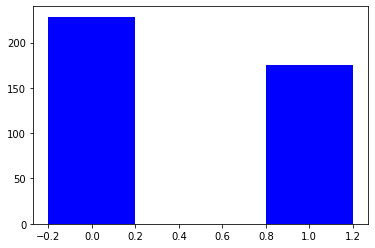

In [55]:
import matplotlib.pyplot as plt
plt.bar(dfJCW.popularity,dfJCW.avg_length, color ='blue',
       width = 0.4)
dfJCW[["popularity", "avg_length"]].describe()

In [16]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data =pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] =[variance_inflation_factor(X.values,i)
for i in range(len(X.columns))]
vif_data

,feature,VIF
0,avg_length,9.114041
1,avg_negativity,3.501384
2,avg_positivity,5.287340
3,useful,12.676556
4,funny,9.312259
5,cool,11.325589
6,exotic,1.509069


In [17]:
dfJCW = dfJCW.drop(columns= ['avg_readablity','avg_subjectivity'], axis=1)

In [18]:
#correlation
X.corr()

,avg_length,avg_negativity,avg_positivity,useful,funny,cool,exotic
avg_length,1.000000,0.111452,-0.173117,0.071206,0.092475,0.038712,0.063681
avg_negativity,0.111452,1.000000,-0.655441,-0.148683,-0.089805,-0.213651,-0.086345
avg_positivity,-0.173117,-0.655441,1.000000,0.117267,0.037823,0.144701,0.094877
useful,0.071206,-0.148683,0.117267,1.000000,0.827605,0.857846,0.174052
funny,0.092475,-0.089805,0.037823,0.827605,1.000000,0.866572,0.140651
cool,0.038712,-0.213651,0.144701,0.857846,0.866572,1.000000,0.165254
exotic,0.063681,-0.086345,0.094877,0.174052,0.140651,0.165254,1.000000


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3,random_state=0)

In [20]:
#logistic
import statsmodels.api as sm
log_regJCW = sm.Logit(y_train, X_train).fit()

print(log_regJCW.summary())

Optimization terminated successfully.
         Current function value: 0.656916
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                  699
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                 0.05220
Time:                        00:05:00   Log-Likelihood:                -459.18
converged:                       True   LL-Null:                       -484.47
Covariance Type:            nonrobust   LLR p-value:                 3.595e-09
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
avg_length         0.0078      0.003      2.850      0.004       0.002       0.013
avg_negativity   

In [22]:
#logistic accuracy
from sklearn.metrics import confusion_matrix
pred_prob = log_regJCW.predict(X_val)

pred = list(map(round, pred_prob))
confusion_matrix(y_val,pred)

array([[96, 50],
       [59, 95]])

In [23]:
#Setting up for AUC/ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

lr_auc = roc_auc_score(y_val, pred_prob)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.661


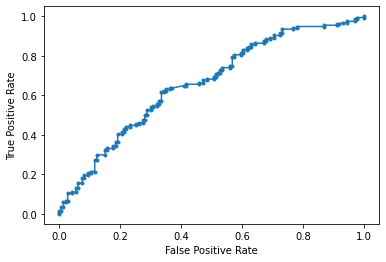

In [25]:
#ROC
lr_fpr, lr_tpr, threshold = roc_curve(y_val, pred_prob)
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
#dtrees
from sklearn import tree
from sklearn.tree import export_text

dtree = tree.DecisionTreeClassifier(max_depth=4,min_samples_split=30)
dtree = dtree.fit(X_train, y_train)

r = export_text(dtree, feature_names=list(X_train.columns.values))
print(r)

|--- exotic <= 0.15
|   |--- avg_length <= 86.93
|   |   |--- avg_positivity <= 0.23
|   |   |   |--- avg_positivity <= 0.21
|   |   |   |   |--- class: 0
|   |   |   |--- avg_positivity >  0.21
|   |   |   |   |--- class: 1
|   |   |--- avg_positivity >  0.23
|   |   |   |--- useful <= 3.18
|   |   |   |   |--- class: 0
|   |   |   |--- useful >  3.18
|   |   |   |   |--- class: 1
|   |--- avg_length >  86.93
|   |   |--- funny <= 0.26
|   |   |   |--- useful <= 0.80
|   |   |   |   |--- class: 1
|   |   |   |--- useful >  0.80
|   |   |   |   |--- class: 0
|   |   |--- funny >  0.26
|   |   |   |--- funny <= 2.24
|   |   |   |   |--- class: 1
|   |   |   |--- funny >  2.24
|   |   |   |   |--- class: 1
|--- exotic >  0.15
|   |--- useful <= 2.62
|   |   |--- avg_length <= 97.17
|   |   |   |--- avg_length <= 96.24
|   |   |   |   |--- class: 0
|   |   |   |--- avg_length >  96.24
|   |   |   |   |--- class: 1
|   |   |--- avg_length >  97.17
|   |   |   |--- cool <= 1.75
|   |   |   

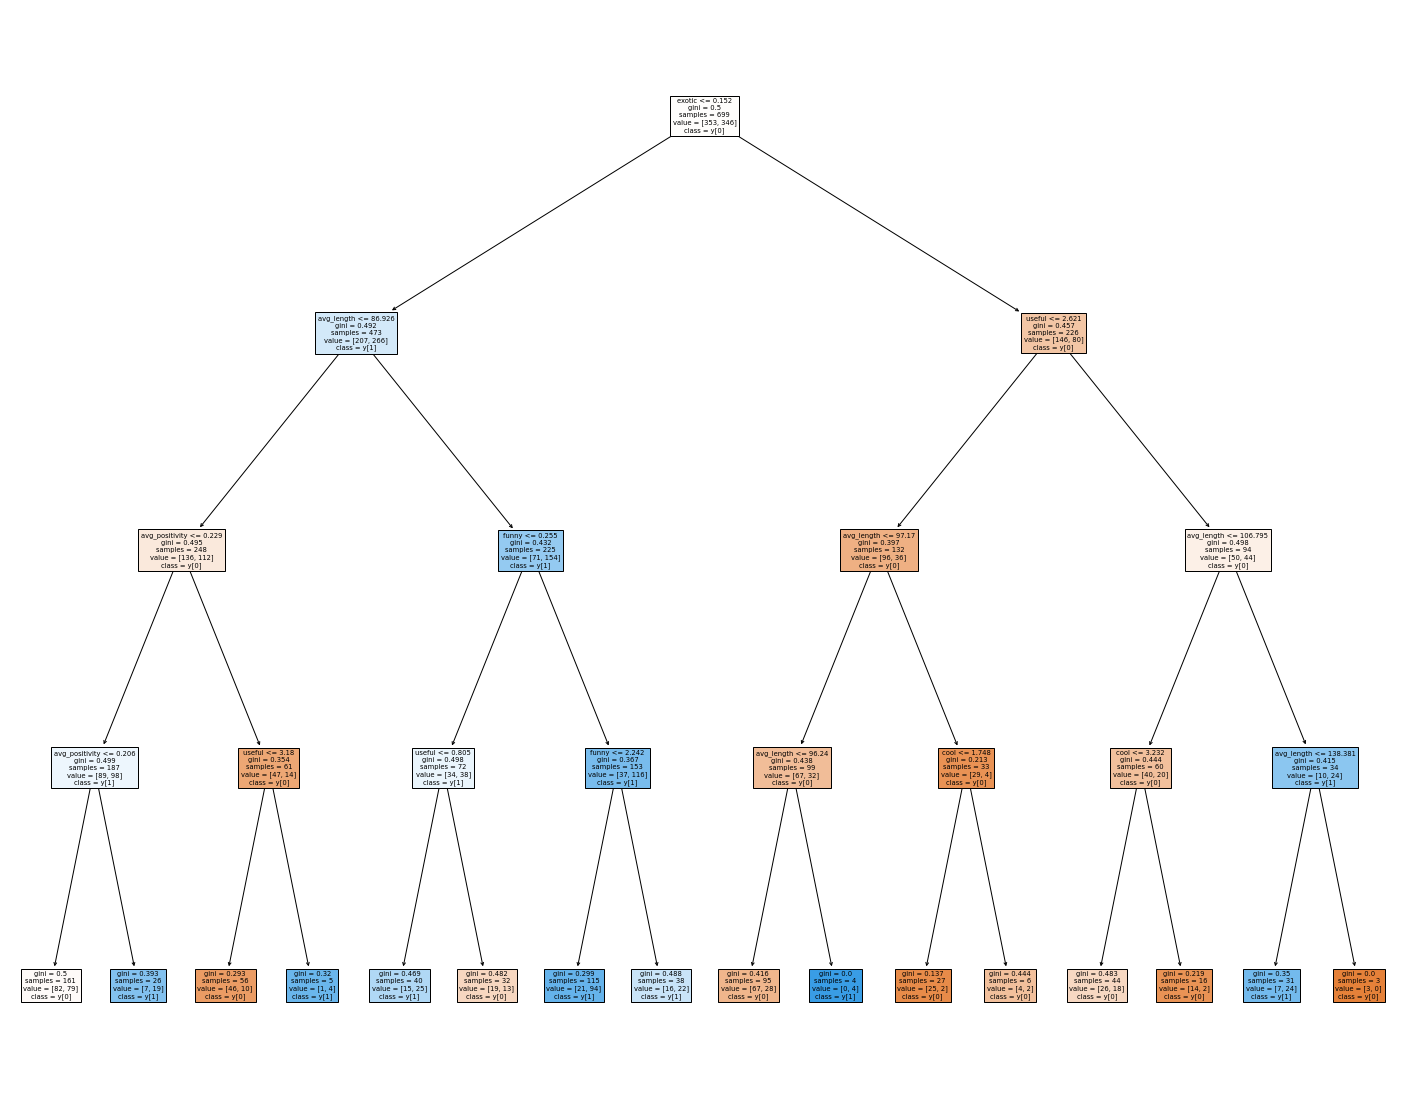

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize=[25,20])
tree.plot_tree(dtree,
               feature_names=list(X_train.columns.values),
               class_names=True,
               filled=True)
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

prediction = dtree.predict(X_val)
confusion_matrix(y_val, prediction)

array([[110,  36],
       [ 91,  63]])

In [29]:
dtree.score(X_val,y_val)

0.5766666666666667

In [33]:
#dtree2
from sklearn import tree
from sklearn.tree import export_text
dtree2 = tree.DecisionTreeClassifier()
dtree2 = dtree2.fit(X_train,y_train)

In [34]:
r2 = export_text(dtree2, feature_names=list(X_train.columns.values))
print(r2)

|--- exotic <= 0.15
|   |--- avg_length <= 86.93
|   |   |--- avg_positivity <= 0.23
|   |   |   |--- avg_positivity <= 0.21
|   |   |   |   |--- avg_positivity <= 0.19
|   |   |   |   |   |--- avg_length <= 52.12
|   |   |   |   |   |   |--- useful <= 2.37
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- useful >  2.37
|   |   |   |   |   |   |   |--- useful <= 2.99
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- useful >  2.99
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_length >  52.12
|   |   |   |   |   |   |--- avg_negativity <= 0.04
|   |   |   |   |   |   |   |--- avg_negativity <= 0.01
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- avg_negativity >  0.01
|   |   |   |   |   |   |   |   |--- avg_positivity <= 0.18
|   |   |   |   |   |   |   |   |   |--- avg_length <= 58.39
|   |   |   |   |   |   |   |   |   |   |--- avg_negativity <= 0.03
|   |   |   |   |   |   

In [35]:
#Tree size?
x_nodes = dtree2.tree_.node_count
print(x_nodes)

351


In [52]:
#Pruning & ccp dictate tree size
path = dtree2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [44]:
#Combining
dtrees = []
for ccp_alpha in ccp_alphas:
  dtree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  dtree.fit(X_train, y_train)
  dtrees.append(dtree2)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dtrees[-1].tree_.node_count, ccp_alphas[-1]
        )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.01900117609009372


In [45]:
#Valid eval
train_scores = [dtree.score(X_train, y_train) for dtree in dtrees]
validation_scores = [dtree.score(X_val, y_val) for dtree in dtrees]

print(validation_scores)
print(ccp_alphas)

accuracy_list = pd.DataFrame(
    {'validation_scores': validation_scores,
'ccp_alphas': ccp_alphas,
})

accuracy_list

[0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667,

,validation_scores,ccp_alphas
0,0.486667,0.000000
1,0.486667,0.000341
2,0.486667,0.000668
3,0.486667,0.000763
4,0.486667,0.000954
...,...,...
81,0.486667,0.007307
82,0.486667,0.007436
83,0.486667,0.011418
84,0.486667,0.018298


In [47]:
#Model eval
from sklearn.metrics import confusion_matrix

prediction = dtree.predict(X_val)

confusion_matrix(y_val, prediction)

array([[146,   0],
       [154,   0]])

In [48]:
dtree.score(X_val,y_val) #accuracy

0.4866666666666667

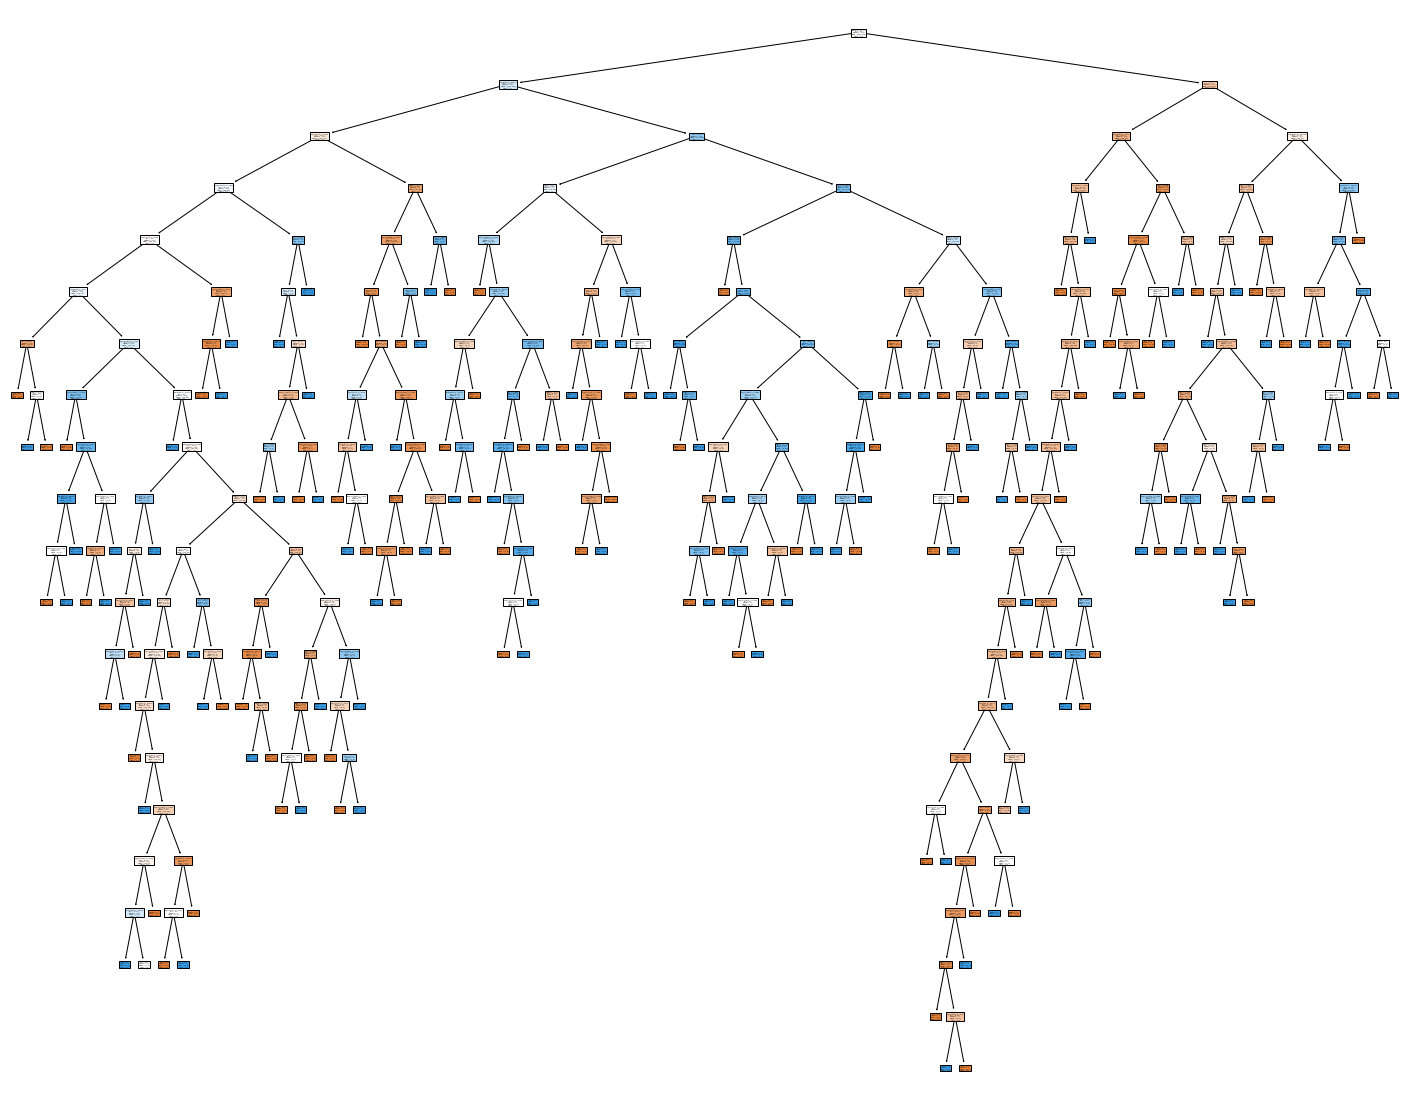

In [57]:
dtree2 = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0008366214322590161)
dtree2 = dtree2.fit(X_train,y_train)
from matplotlib import pyplot as plt
plt.figure(figsize=[25,20])
tree.plot_tree(dtree2,
feature_names=list(X_train.columns.values),
class_names=True,
filled=True)
plt.show() 